In [1]:
import numpy as np

# 加载训练损失数据
training_loss = np.load('/home/yanlutao/research/FED/OpenFedLLM_moe/output/vicgalle/alpaca_gpt4/training_loss.npy')

# 查看数组的形状
print("Shape of training_loss:", training_loss.shape)


Shape of training_loss: (20, 200)


In [2]:
# 计算基本统计信息
mean_loss = np.mean(training_loss[training_loss != -1])
std_loss = np.std(training_loss[training_loss != -1])
min_loss = np.min(training_loss[training_loss != -1])
max_loss = np.max(training_loss[training_loss != -1])

print("Mean loss:", mean_loss)
print("Standard deviation of loss:", std_loss)
print("Min loss:", min_loss)
print("Max loss:", max_loss)

# 计算并显示 -1 值的数量
num_missing_values = np.sum(training_loss == -1)
total_values = training_loss.size
missing_percentage = (num_missing_values / total_values) * 100

print("Number of missing values (-1):", num_missing_values)
print("Percentage of missing values:", missing_percentage, "%")

# 查看每个客户端缺失值的数量
missing_values_per_client = np.sum(training_loss == -1, axis=1)
for i, missing_count in enumerate(missing_values_per_client):
    print(f"Client {i+1} missing values: {missing_count}")


Mean loss: 6.603383894920349
Standard deviation of loss: 0.1751520979160019
Min loss: 6.215381240844726
Max loss: 7.436380767822266
Number of missing values (-1): 3600
Percentage of missing values: 90.0 %
Client 1 missing values: 182
Client 2 missing values: 181
Client 3 missing values: 173
Client 4 missing values: 178
Client 5 missing values: 182
Client 6 missing values: 185
Client 7 missing values: 172
Client 8 missing values: 182
Client 9 missing values: 179
Client 10 missing values: 185
Client 11 missing values: 187
Client 12 missing values: 179
Client 13 missing values: 181
Client 14 missing values: 183
Client 15 missing values: 181
Client 16 missing values: 178
Client 17 missing values: 174
Client 18 missing values: 182
Client 19 missing values: 172
Client 20 missing values: 184


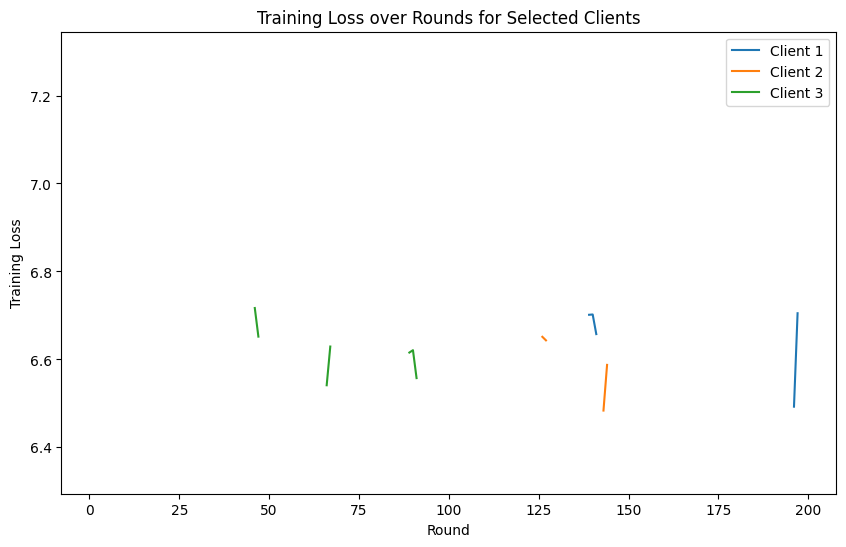

In [3]:
import matplotlib.pyplot as plt

# 假设 training_loss 是一个二维数组，形状为 (num_clients, num_rounds)
num_clients, num_rounds = training_loss.shape

# 选择几个客户端进行绘制
selected_clients = [0, 1, 2]  # 选择前三个客户端，你可以修改这个索引来选择其他客户端

# 创建一个掩码数组，忽略值为 -1 的位置
masked_loss = np.ma.masked_equal(training_loss, -1)

# 绘制选择的客户端的训练损失曲线
plt.figure(figsize=(10, 6))
for client in selected_clients:
    plt.plot(range(num_rounds), masked_loss[client], label=f'Client {client+1}')

plt.xlabel('Round')
plt.ylabel('Training Loss')
plt.title('Training Loss over Rounds for Selected Clients')
plt.legend()
plt.show()


[7.337186050415039 7.254538345336914 7.244985580444336 7.155009460449219
 7.0094440460205085 6.996486663818359 6.898926544189453 6.935012435913086
 6.96829833984375 6.9097339630126955 6.806894683837891 6.8844043731689455
 6.799151611328125 6.821642684936524 6.839310836791992 6.99268913269043
 6.720180511474609 6.82769660949707 6.778136825561523 6.931464767456054
 6.774197387695312 6.806120300292969 6.635345458984375 6.779475402832031
 6.79619255065918 6.827890014648437 6.754077911376953 6.713298034667969
 6.747262191772461 6.772996139526367 6.779412078857422 6.7462409973144535
 6.7250923156738285 6.8486579895019535 6.6736801147460945
 6.643265914916992 6.818485260009766 6.698913192749023 6.653141021728516
 6.6546672821044925 6.622536849975585 6.71678810119629 6.700400924682617
 6.707206726074219 6.677969360351563 6.635671997070313 6.675448226928711
 6.644126510620117 6.66822395324707 6.763060760498047 6.7005149841308596
 6.550180816650391 6.573405838012695 6.695217895507812 6.595834732

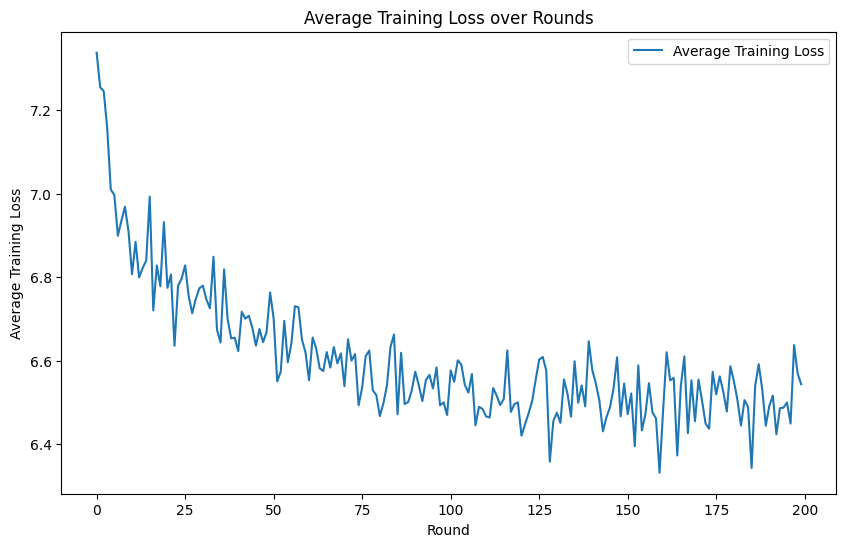

In [5]:
# 计算每轮的平均训练损失，忽略 -1 值
average_loss_per_round = np.ma.mean(masked_loss, axis=0)

# 绘制平均训练损失曲线
plt.figure(figsize=(10, 6))
plt.plot(range(num_rounds), average_loss_per_round, label='Average Training Loss')
plt.xlabel('Round')
plt.ylabel('Average Training Loss')
plt.title('Average Training Loss over Rounds')
plt.legend()
plt.show()
